# NYPD Arrest Data

### About the Dataset:
- This is a breakdown of every arrest effected in NYC by the NYPD during the current year.
- This data is manually extracted every quarter and reviewed by the Office of Management Analysis and Planning.
- Each record represents an arrest effected in NYC by the NYPD and includes information about the type of crime, the location and time of enforcement.
- In addition, information related to suspect demographics is also included.
- This data can be used by the public to explore the nature of police enforcement activity.

### Dataset Description
The dataset retrieved from 'NYC OpenData'. This has information about number of arrests made in the current fiscal year(2021). This dataset is update frequncy is every quarter.

<b>Dataset Source</b>: https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc/data 

### Columns in the Dataset

- <b>ARREST_KEY</b>: Randomly generated persistent ID for each arrest
- <b>ARREST_DATE</b>: Exact date of arrest for the reported event
- <b>PD_CD</b>: Three digit internal classification code (more granular than Key Code)
- <b>PD_DESC</b>: Description of internal classification corresponding with PD code (more granular than Offense Description)
- <b>KY_CD</b>: Three digit internal classification code (more general category than PD code)
- <b>OFNS_DESC</b>: Description of internal classification corresponding with KY code (more general category than PD description)
- <b>LAW_CODE</b>: Law code charges corresponding to the NYS Penal Law, VTL and other various local laws
- <b>LAW_CAT_CD</b>: Level of offense: felony, misdemeanor, violation
- <b>ARREST_BORO</b>: Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)
- <b>ARREST_PRECINCT</b>: Precinct where the arrest occurred
- <b>JURISDICTION_CODE</b>: Jurisdiction responsible for arrest. Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions
- <b>AGE_GROUP</b>: Perpetrator’s age within a category
- <b>PERP_SEX</b>: Perpetrator’s sex description
- <b>PERP_RACE</b>: Perpetrator’s race description
- <b>X_COORD_CD</b>: Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
- <b>Y_COORD_CD</b>: Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
- <b>Latitude</b>: Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
- <b>Longitude</b>: Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
- <b>New Georeferenced Column</b>: pinpoints geocode of the location

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
# creating dataframe
df = pd.read_csv('https://raw.githubusercontent.com/suresh1308/DATA602/main/Data/NYPD_Arrest_Data__Year_to_Date_.csv')

## Exploring Dataset

In [3]:
# checking the data in dataframe
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,234188790,09/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)


In [4]:
# describing dataset
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.555070e+05,155478.000000,155404.000000,155507.000000,155507.000000,1.555070e+05,155507.000000,155507.000000,155507.000000
mean,2.304676e+08,407.828066,244.962974,62.850322,0.912486,1.004996e+06,208163.457555,40.737994,-73.925113
std,4.628028e+06,275.739138,150.334545,35.258605,7.894204,2.152869e+04,29904.384015,0.082086,0.077640
min,2.224711e+08,0.000000,101.000000,1.000000,0.000000,9.142140e+05,121312.000000,40.499401,-74.251844
25%,2.263289e+08,113.000000,111.000000,34.000000,0.000000,9.912230e+05,185908.000000,40.676902,-73.974837
50%,2.306202e+08,339.000000,235.000000,62.000000,0.000000,1.004222e+06,207067.000000,40.735036,-73.927979
75%,2.344524e+08,705.000000,344.000000,101.000000,0.000000,1.017119e+06,235804.000000,40.813903,-73.881512
max,2.385139e+08,997.000000,995.000000,123.000000,97.000000,1.066928e+06,271820.000000,40.912723,-73.701612


In [5]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                155507 non-null  int64  
 1   ARREST_DATE               155507 non-null  object 
 2   PD_CD                     155478 non-null  float64
 3   PD_DESC                   155404 non-null  object 
 4   KY_CD                     155404 non-null  float64
 5   OFNS_DESC                 155404 non-null  object 
 6   LAW_CODE                  155507 non-null  object 
 7   LAW_CAT_CD                154114 non-null  object 
 8   ARREST_BORO               155507 non-null  object 
 9   ARREST_PRECINCT           155507 non-null  int64  
 10  JURISDICTION_CODE         155507 non-null  int64  
 11  AGE_GROUP                 155507 non-null  object 
 12  PERP_SEX                  155507 non-null  object 
 13  PERP_RACE                 155507 non-null  o

In [6]:
# checking number of unique values in columns
df.nunique()

ARREST_KEY                  155507
ARREST_DATE                    365
PD_CD                          260
PD_DESC                        241
KY_CD                           66
OFNS_DESC                       63
LAW_CODE                      1005
LAW_CAT_CD                       4
ARREST_BORO                      5
ARREST_PRECINCT                 77
JURISDICTION_CODE               26
AGE_GROUP                        5
PERP_SEX                         2
PERP_RACE                        7
X_COORD_CD                   27466
Y_COORD_CD                   29300
Latitude                     34210
Longitude                    34210
New Georeferenced Column     34217
dtype: int64

In [7]:
# checking shape of dataset
df.shape

(155507, 19)

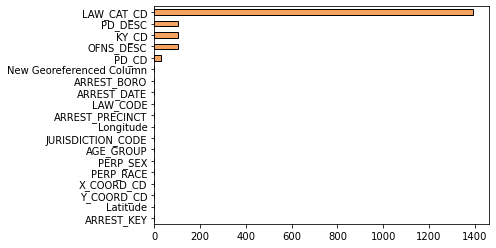

In [8]:
# checking null values in dataset
df.isnull().sum().sort_values(ascending=True).plot.barh(color = 'sandybrown', edgecolor='k')
plt.show()

The dataset has 155507 rows 19 columns. Observed inconsistencies are mentioned below.

## Data Inconsistencies

- Observed that 'LAW_CAT_CD' has 1393 null values (almost negligible since it has over 155k rows)
- There are very few null values in 'PD_CD','PD_DESC','KY_CD' and 'OFNS_DESC' as well.

## Data Cleaning

In [9]:
# conveting data types
df = df.convert_dtypes()

In [10]:
# converting 'Arrest_Date' to date type
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ARREST_KEY                155507 non-null  Int64         
 1   ARREST_DATE               155507 non-null  datetime64[ns]
 2   PD_CD                     155478 non-null  Int64         
 3   PD_DESC                   155404 non-null  string        
 4   KY_CD                     155404 non-null  Int64         
 5   OFNS_DESC                 155404 non-null  string        
 6   LAW_CODE                  155507 non-null  string        
 7   LAW_CAT_CD                154114 non-null  string        
 8   ARREST_BORO               155507 non-null  string        
 9   ARREST_PRECINCT           155507 non-null  Int64         
 10  JURISDICTION_CODE         155507 non-null  Int64         
 11  AGE_GROUP                 155507 non-null  string        
 12  PE

In [12]:
# dropping location coordinate columns as they don't require in analysis
df = df.drop(['X_COORD_CD','Y_COORD_CD','Latitude','Longitude','New Georeferenced Column'],axis=1)
# dropping 'Arrest_key' column as it has all unique values
df = df.drop(['ARREST_KEY'],axis=1)

In [13]:
# Shape of dataset
df.shape

(155507, 13)

After dropping above columns, new dataset has 155,507 rows and 13 columns

## Sanity check to identify duplicates

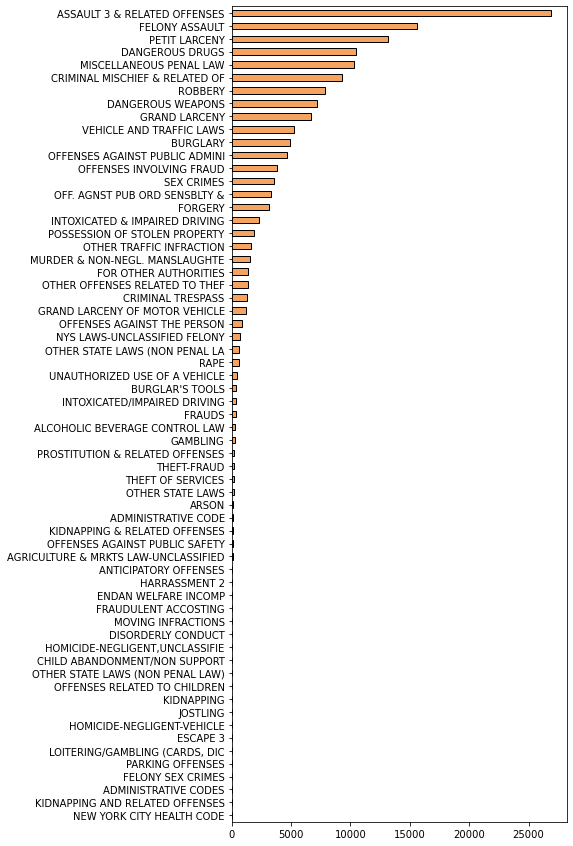

In [14]:
# checking 'offence description' column for duplicate values
df.OFNS_DESC.value_counts().sort_values(ascending=True).plot.barh(figsize=(6,15),color = 'sandybrown', edgecolor='k')
plt.show()

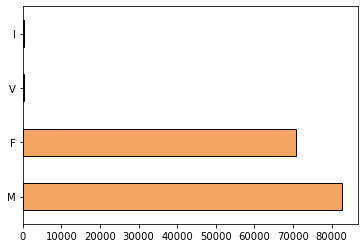

In [15]:
# Checking level of offence column
df.LAW_CAT_CD.value_counts().plot.barh(color = 'sandybrown', edgecolor='k')
plt.show()

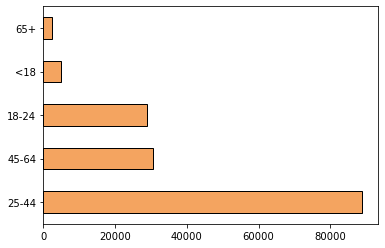

In [16]:
# Checking perpetrator's age group column
df.AGE_GROUP.value_counts().plot.barh(color = 'sandybrown', edgecolor='k')
plt.show()

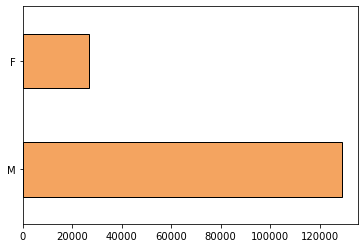

In [17]:
# Checking perpetrator's sex column
df.PERP_SEX.value_counts().plot.barh(color = 'sandybrown', edgecolor='k')
plt.show()

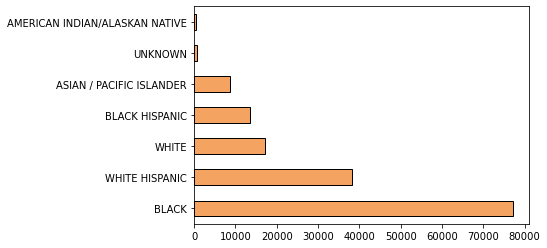

In [18]:
# Checking perpetrator's race column
df.PERP_RACE.value_counts().plot.barh(color = 'sandybrown', edgecolor='k')
plt.show()

### Observations

- The top three offenses are 'ASSAULT 3 & RELATED OFFENSES,' 'FELONY ASSAULT,' and 'PETIT LARCENY.'
- The highest level of offenses are'misdemeanor' and 'felony.'
- People aged 25 to 44 are more likely to engage in criminal activities.
- Males are more likely to commit crimes than females.
- The 'black' and 'white hispanic' races are more likely to commit crimes according to data.

## Distribution Plots

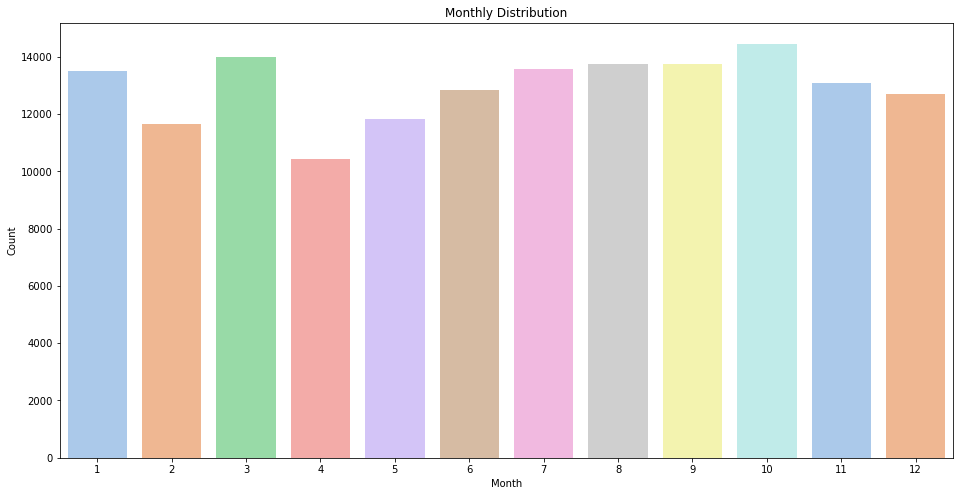

In [29]:
# Monthly distribution plot
sns.countplot(x=df.ARREST_DATE.dt.month, palette="pastel", data=df)
plt.gcf().set_size_inches(16,8)
plt.title('Monthly Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

### Observations

- 'April' is the month with the fewest arrests, while 'october' has the most.
- Arrests have risen from 'April' to 'october,' according to statistics.

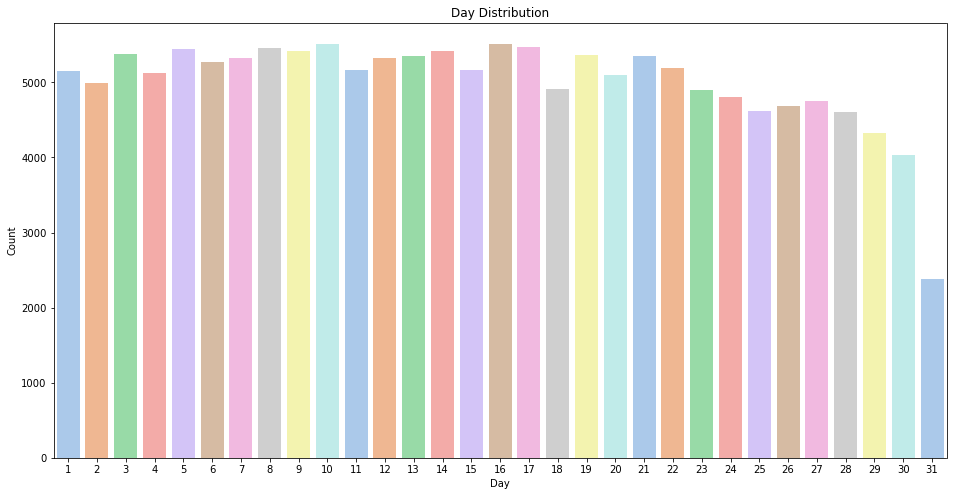

In [31]:
# Day distribution plot
sns.countplot(x=df.ARREST_DATE.dt.day, palette="pastel", data=df)
plt.gcf().set_size_inches(16,8)
plt.title('Day Distribution')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

### Observations

- Up to the 21st of the month, the number of arrests is rather equally distributed.
- There is a significant decline in arrests from the 21st of the month to the end of the month.

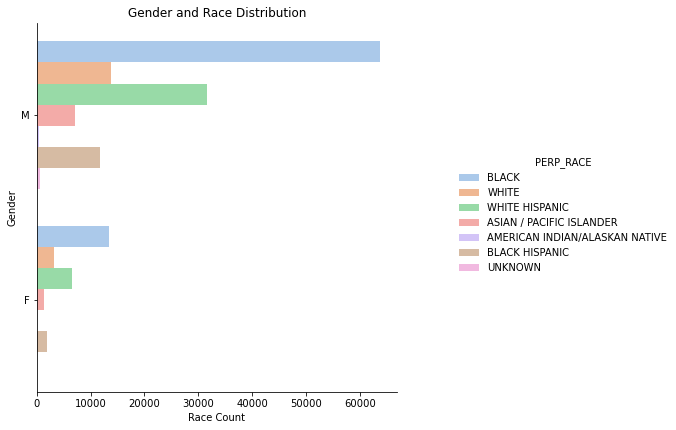

In [44]:
# Gender and Race Distribution
sns.catplot(y="PERP_SEX", hue="PERP_RACE", kind="count", palette="pastel", data=df)
plt.gcf().set_size_inches(10,6)
plt.title('Gender and Race Distribution')
plt.xlabel('Race Count')
plt.ylabel('Gender')
plt.show()

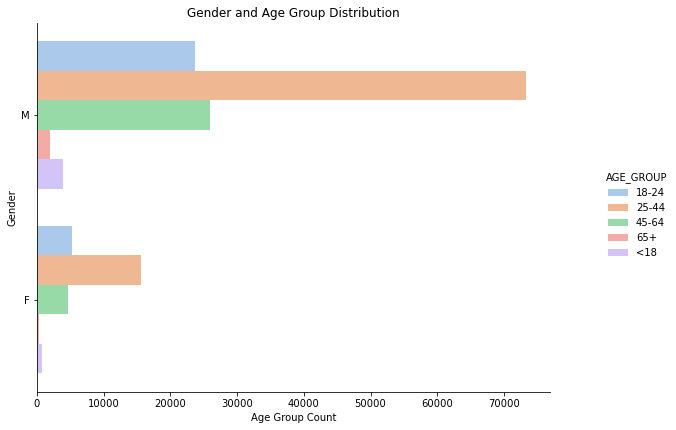

In [43]:
# Gender and Age Distribution
sns.catplot(y="PERP_SEX", hue="AGE_GROUP", kind="count", palette="pastel", data=df)
plt.gcf().set_size_inches(10,6)
plt.title('Gender and Age Group Distribution')
plt.xlabel('Age Group Count')
plt.ylabel('Gender')
plt.show()

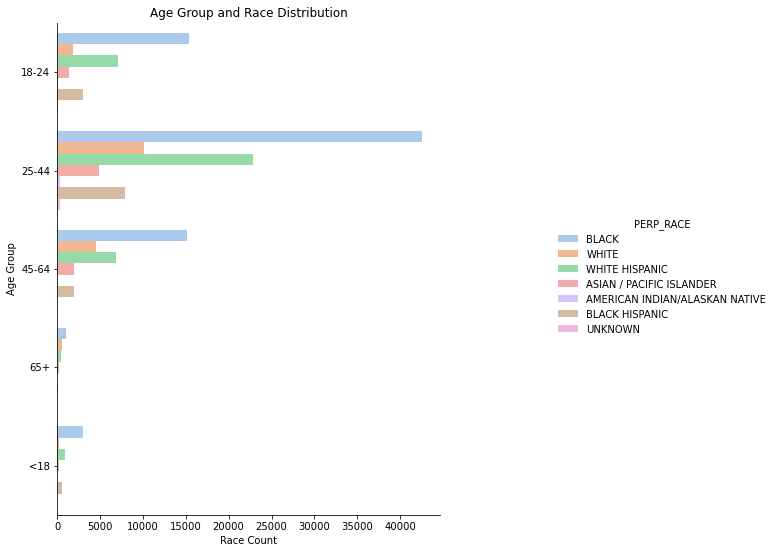

In [45]:
# Age and Race Distribution
sns.catplot(y="AGE_GROUP", hue="PERP_RACE", kind="count", palette="pastel", data=df)
plt.gcf().set_size_inches(12,8)
plt.title('Age Group and Race Distribution')
plt.xlabel('Race Count')
plt.ylabel('Age Group')
plt.show()

### Observations

- People of the 'Black' race are more likely to be detained in both genders.
- The age group '25-44' is involved in criminal activity in both male and female genders.
- 'Black' race individuals commit more crimes than those of other races at every age.